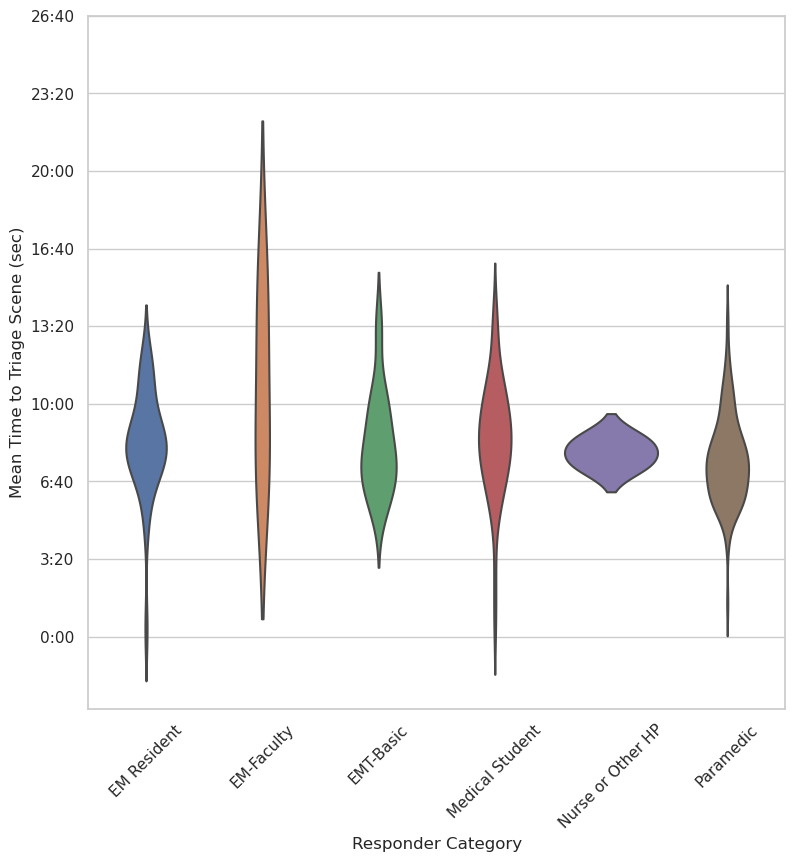

In [43]:

# Set the style of the plot
sns.set(style='whitegrid')

# Create the violin plot with 6 violins
fig, ax = plt.subplots(1, 1, figsize=(9, 9))
ax = sns.violinplot(x=x_column_name, y=y_column_name, data=df, palette=None, inner=None, ax=ax)

# Rotate the x-axis labels to prevent overlapping
plt.xticks(rotation=45)

# Label the x- and y-axis
ax.set_xlabel(x_label)
ax.set_ylabel(y_label)

# Humanize y tick labels
locs, labels = plt.yticks()
yticklabels_list = []
for triage_time, text_obj in zip(locs, labels):
    text_obj.set_text(
        temporalize_fn(triage_time)
    )
    yticklabels_list.append(text_obj)
plt.yticks(locs[1:], yticklabels_list[1:])

plt.show()

In [8]:

# Get the data frame with the cluster label of 3
mask_series = (distance_delta_df.cluster_label == 3)
mask_series = (merge_df.session_uuid == distance_delta_df[mask_series].session_uuid.squeeze()) & (merge_df.scene_id == distance_delta_df[mask_series].scene_id.squeeze())
scene_df = merge_df[mask_series]

color_dict = {
    'Gary_3 Root': '#a6cee3', 'Mike_7 Root': '#1f78b4', 'Gloria_6 Root': '#b2df8a', 'Bob_0 Root': '#33a02c', 'Lily_4 Root': '#fb9a99',
    'Gary_1 Root': '#fdbf6f', 'Gary_9 Root': '#ff7f00', 'Lily_2 Root': '#cab2d6', 'Mike_5 Root': '#6a3d9a', 'Gloria_8 Root': '#bbbb00', 'Helga_10 Root': '#b15928'
}

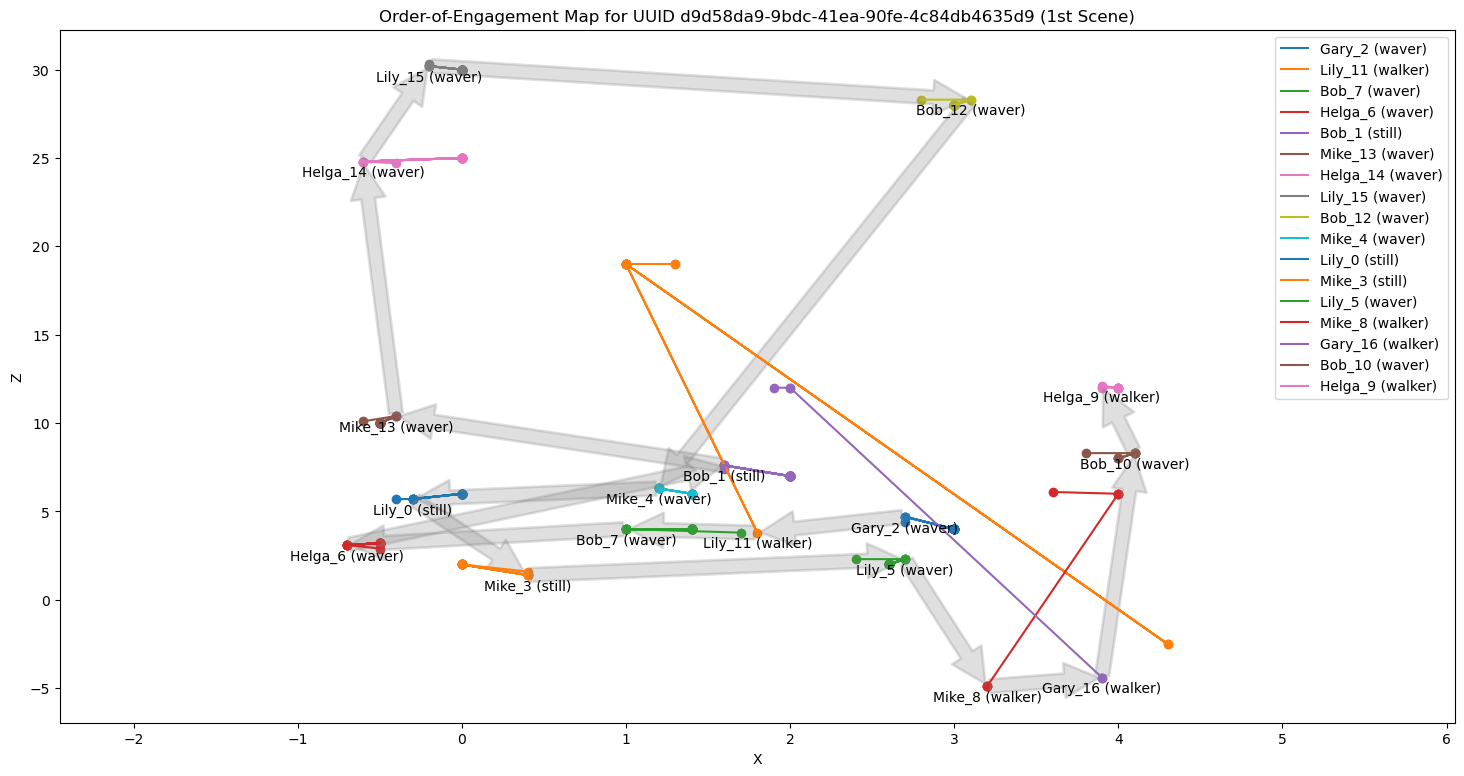

In [9]:

fig, ax = fu.visualize_order_of_engagement(scene_df, engagement_order=None, color_dict=color_dict, verbose=False)

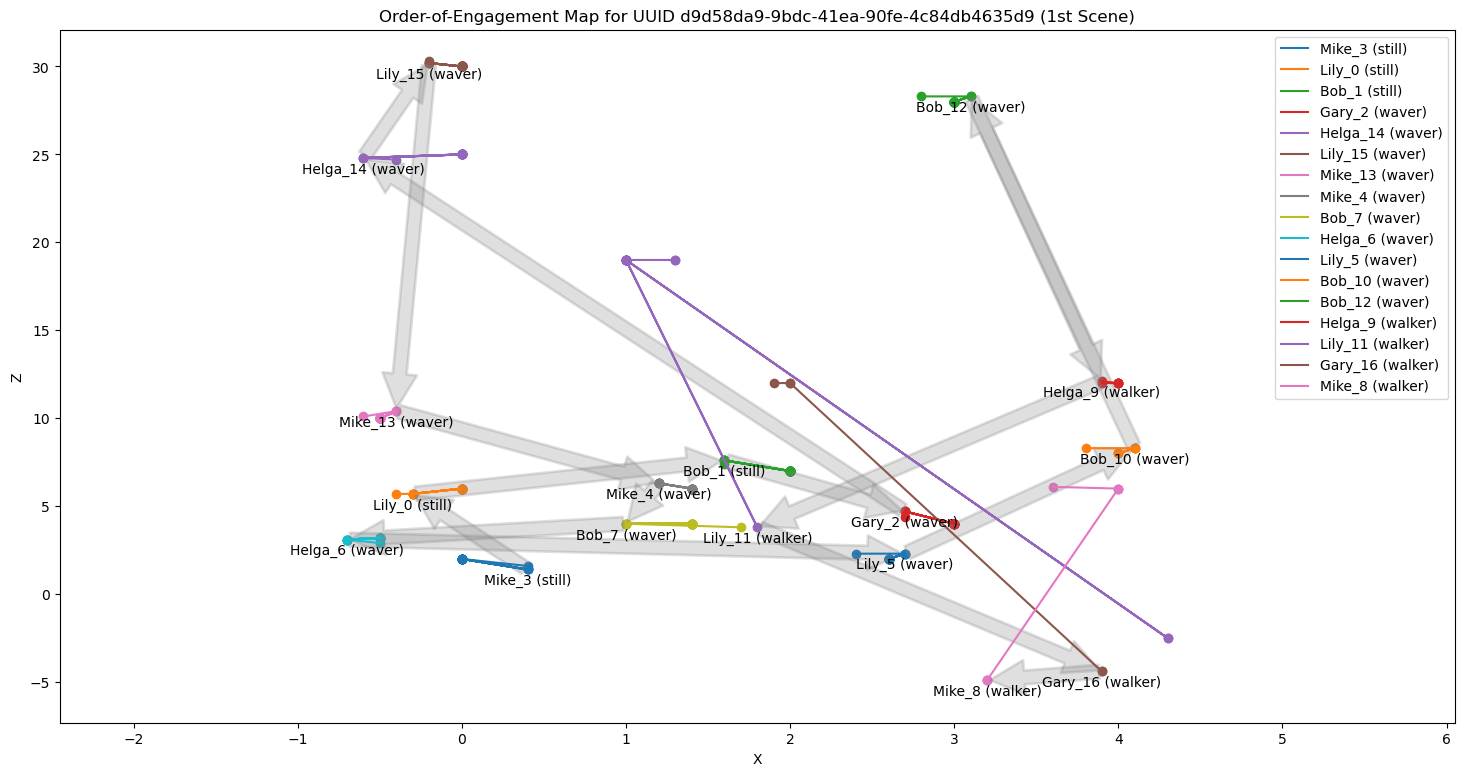

In [10]:

fig, ax = fu.visualize_order_of_engagement(scene_df, engagement_order=fu.get_ideal_engagement_order(scene_df), color_dict=color_dict)


## Abstract
**Methods**:


**Results**: The median time to triage the entire scene was 7:38 minutes (SD = 2:27, IQR = 6:13, 8:59). A robust 93% of participants successfully implemented all required hemorrhage control, with a median time of 4:54 minutes for life-threatening hemorrhage control (SD = 1:48, IQR = 3:57, 6:08). Hemorrhage control per patient took a median of 14 seconds (SD = 0:28, IQR = 0:09, 0:23). Participants accurately tagged 73% of patients and 17% effectively utilized the SALT sort commands for optimal patient evaluation.


## Methods
### Participants

In [4]:

print(
    f'{responders_count} EMS clinicians and healthcare professionals engaged in a VR simulation of a bomb/blast scenario utilizing VRFirstResponder,'
    ' a high-fidelity, fully immersive, automated, customizable, and programmable VR simulation platform.'
    ' All participants signed informed consent approved by the Ohio State IRB.'
)

357 EMS clinicians and healthcare professionals engaged in a VR simulation of a bomb/blast scenario utilizing VRFirstResponder, a high-fidelity, fully immersive, automated, customizable, and programmable VR simulation platform. All participants signed informed consent approved by the Ohio State IRB.



## Data Analysis
### Triage Efficiency
The median time to triage the entire scene was 7:38 minutes (SD = 2:27, IQR = 6:13, 8:59). A robust 93% of participants successfully implemented all required hemorrhage control, with a median time of 4:54 minutes for life-threatening hemorrhage control (SD = 1:48, IQR = 3:57, 6:08). Hemorrhage control per patient took a median of 14 seconds (SD = 0:28, IQR = 0:09, 0:23).


### Triage Accuracy
Participants accurately tagged 79% of patients (SD = 33) and 17% effectively utilized the SALT sort commands for optimal patient evaluation. Tag performance varied across the prioritization levels including Minimal (M = .81, SD = .31), Delayed (M = .79, SD = .35), Immediate (M = .84, SD = 24), Expectant (M = .70, SD = .46), and Dead (M = .97, SD = .17). None of the patients were not tagged. The category with the highest number of errors was Expectant (29.7%), followed by Delayed (27.6%), followed by Minimal (22.4%), followed by Immediate (22.3%) and Dead (2.5%). 


## Exploratory Metrics: Movement Efficiency (de Visser, Babbitt)

In [7]:

# Describe the poster sample dataset
statistics_df = nu.get_statistics(distance_delta_df, ['actual_engagement_distance', 'actual_ideal_delta', 'measure_of_ideal_ordering', 'measure_of_right_ordering'])
statistics_df

,actual_engagement_distance,actual_ideal_delta,measure_of_ideal_ordering,measure_of_right_ordering
mean,34.856288,-1.016468,0.375916,0.567321
mode,0.000000,0.000000,1.000000,1.000000
median,36.210899,-0.613021,0.344637,0.625051
SD,10.289115,5.591005,0.340982,0.366417
min,0.000000,-16.862909,-0.473652,-0.473652
25%,30.498878,-5.027630,0.110934,0.307328
50%,36.210899,-0.613021,0.344637,0.625051
75%,41.206530,2.628130,0.654364,0.918995
max,91.247935,16.960349,1.000000,1.000000


In [8]:

# Get the highest correlations
series_dict = distance_delta_df.corr().to_dict(orient='series')
corr_tuples_list = []
for cn, cn_srs in series_dict.items():
    mask_srs = (cn_srs < 1.0)
    srs = cn_srs[mask_srs].map(lambda x: abs(x)).sort_values(ascending=False).head(1)
    if srs.shape[0]:
        corr_tuple = (cn, srs.index[0], srs.values[0])
        corr_tuples_list.append(corr_tuple)
sorted(corr_tuples_list, key=lambda x: x[2], reverse=True)

[('ideal_engagement_distance', 'distracted_engagement_distance', 0.8705011644417627), ('distracted_engagement_distance', 'ideal_engagement_distance', 0.8705011644417627), ('actual_engagement_distance', 'ideal_engagement_distance', 0.850416833254445), ('measure_of_ideal_ordering', 'measure_of_right_ordering', 0.8382668821743244), ('measure_of_right_ordering', 'measure_of_ideal_ordering', 0.8382668821743244), ('actual_distracted_delta', 'actual_engagement_distance', 0.7801978899685487), ('cluster_label', 'ideal_engagement_distance', 0.6381183101260517), ('adherence_to_salt', 'measure_of_ideal_ordering', 0.6174410098316563), ('actual_ideal_delta', 'actual_distracted_delta', 0.559092326243172), ('last_still_engagement', 'measure_of_right_ordering', 0.5446534207085381), ('scene_id', 'cluster_label', 0.38817630103984097), ('patient_count', 'ideal_engagement_distance', 0.13392139597508854), ('measure_of_distracted_ordering', 'distracted_engagement_distance', 0.10616400793606245)]

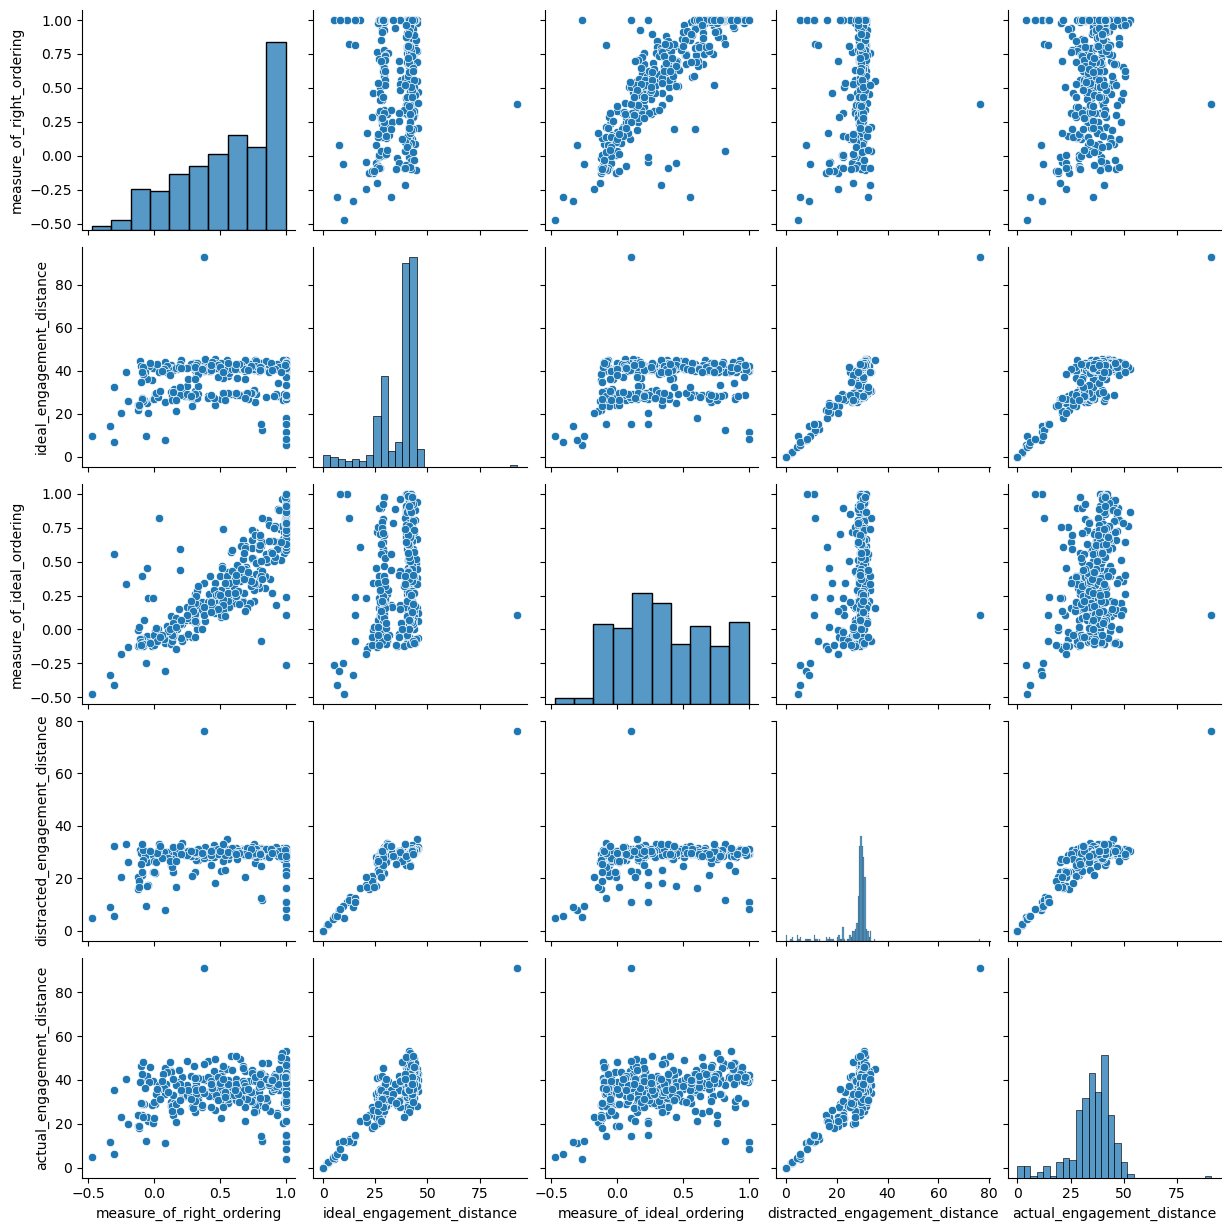

In [10]:

import seaborn as sns

columns_set = set()
for column_left, column_right, corr_value in corr_tuples_list:
    if corr_value > 0.8:
        columns_set.add(column_left)
        columns_set.add(column_right)
PairGrid_obj = sns.pairplot(distance_delta_df[columns_set])


Describe location metrics (Distance traveled, Patient revisits, Movement efficiency, Ideal movement difference score from actual)

In [6]:

columns_list = ['actual_engagement_distance', 'measure_of_ideal_ordering', 'measure_of_right_ordering', 'actual_ideal_delta']
for cn, stats_dict in nu.get_statistics(distance_delta_df[base_mask_series], columns_list).to_dict().items():
    metric_name = cn.replace('_', ' ').title().replace(' Of ', ' of ')
    mean_value = stats_dict['mean']
    standard_deviation = stats_dict['SD']
    iqr_lower = stats_dict['25%']
    iqr_higher = stats_dict['75%']
    print(f'{metric_name}: {mean_value:.2f} (SD = {standard_deviation:.2f}, IQR = {iqr_lower:.2f}, {iqr_higher:.2f})')

Actual Engagement Distance: 19.37 (SD = 16.77, IQR = 0.00, 35.86)
Measure of Ideal Ordering: 0.45 (SD = 0.42, IQR = 0.12, 0.83)
Measure of Right Ordering: 0.60 (SD = 0.42, IQR = 0.31, 1.00)
Actual Ideal Delta: -0.19 (SD = 4.81, IQR = -0.11, 1.08)


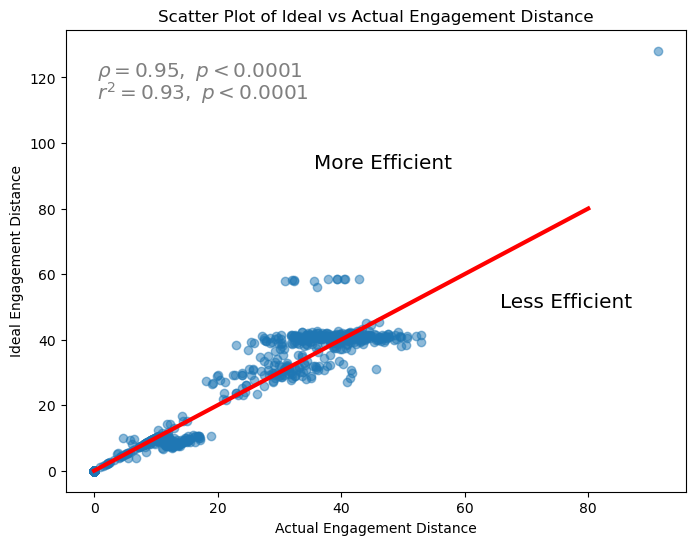

In [8]:

# Create the scatter plot
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(distance_delta_df['actual_engagement_distance'], distance_delta_df['ideal_engagement_distance'], alpha=0.5)

# Add labels and title
ax.set_xlabel('Actual Engagement Distance')
ax.set_ylabel('Ideal Engagement Distance')
ax.set_title('Scatter Plot of Ideal vs Actual Engagement Distance')

# Add a dashed diagonal line x=y
ax.plot([0, 80], [0, 80], linestyle='-', color='red', linewidth=3, alpha=1.0)
text_tuple = ax.text(0.4, 0.7, 'More Efficient', alpha=1.0, transform=ax.transAxes, fontsize='x-large')
text_tuple = ax.text(0.7, 0.4, 'Less Efficient', alpha=1.0, transform=ax.transAxes, fontsize='x-large')

# Annotate with Spearman's Rank Correlation Coefficient
s_str = nu.get_spearman_rho_value_latex(distance_delta_df['actual_engagement_distance'], distance_delta_df['ideal_engagement_distance'])
text_tuple = ax.text(0.05, 0.9, s_str, alpha=0.5, transform=ax.transAxes, fontsize='x-large')

# Annotate with Coefficient of Determination
s_str = nu.get_r_squared_value_latex(distance_delta_df['actual_engagement_distance'], distance_delta_df['ideal_engagement_distance'])
text_tuple = ax.text(0.05, 0.85, s_str, alpha=0.5, transform=ax.transAxes, fontsize='x-large')

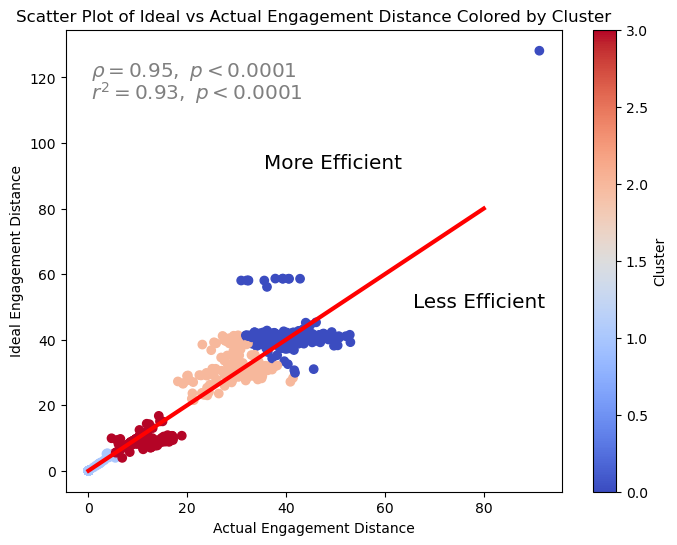

In [9]:

# Identify the two blobs
from sklearn.cluster import KMeans

columns_list = ['actual_engagement_distance', 'ideal_engagement_distance']
X = distance_delta_df[columns_list].values
kmeans = KMeans(n_clusters=4)  # Set number of clusters to 2
kmeans.fit(X)

# Get cluster labels for each data point
labels = kmeans.labels_

# Identify centers of each cluster (assuming they represent blob centers)
cluster_centers = kmeans.cluster_centers_

# Create the scatter plot (mappable object)
fig, ax = plt.subplots(figsize=(8, 6))
cmap = plt.cm.coolwarm
scatter = ax.scatter(distance_delta_df['actual_engagement_distance'], distance_delta_df['ideal_engagement_distance'], c=labels, cmap=cmap)

# Add labels and title
ax.set_xlabel('Actual Engagement Distance')
ax.set_ylabel('Ideal Engagement Distance')
ax.set_title('Scatter Plot of Ideal vs Actual Engagement Distance Colored by Cluster')

# Add the colorbar, referencing the scatter plot
plt.colorbar(scatter, label='Cluster')  # Use the scatter object as the mappable

# Add a dashed diagonal line x=y
ax.plot([0, 80], [0, 80], linestyle='-', color='red', linewidth=3, alpha=1.0)
text_tuple = ax.text(0.4, 0.7, 'More Efficient', alpha=1.0, transform=ax.transAxes, fontsize='x-large')
text_tuple = ax.text(0.7, 0.4, 'Less Efficient', alpha=1.0, transform=ax.transAxes, fontsize='x-large')

# Annotate with Spearman's Rank Correlation Coefficient
s_str = nu.get_spearman_rho_value_latex(distance_delta_df['actual_engagement_distance'], distance_delta_df['ideal_engagement_distance'])
text_tuple = ax.text(0.05, 0.9, s_str, alpha=0.5, transform=ax.transAxes, fontsize='x-large')

# Annotate with Coefficient of Determination
s_str = nu.get_r_squared_value_latex(distance_delta_df['actual_engagement_distance'], distance_delta_df['ideal_engagement_distance'])
text_tuple = ax.text(0.05, 0.85, s_str, alpha=0.5, transform=ax.transAxes, fontsize='x-large')

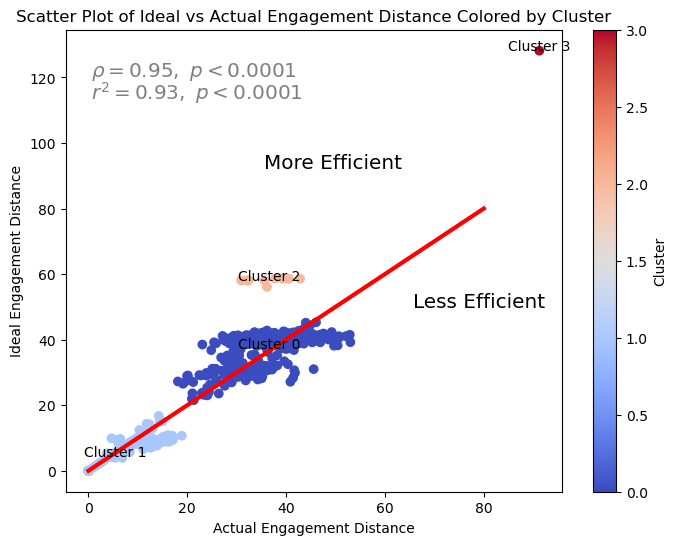

In [38]:

# Identify the two blobs
from sklearn.cluster import DBSCAN

columns_list = ['actual_engagement_distance', 'ideal_engagement_distance']
X = distance_delta_df[columns_list].values

# Set appropriate parameters for DBSCAN based on your data
dbscan = DBSCAN(eps=5, min_samples=1)
dbscan.fit(X)

# Get cluster labels for each data point
labels = dbscan.labels_

# Identify core points within each cluster (assuming they represent blob centers)
core_points = dbscan.components_

# Create the scatter plot (mappable object)
fig, ax = plt.subplots(figsize=(8, 6))
cmap = plt.cm.coolwarm
scatter = ax.scatter(distance_delta_df['actual_engagement_distance'], distance_delta_df['ideal_engagement_distance'], c=labels, cmap=cmap)

# Add labels and title
ax.set_xlabel('Actual Engagement Distance')
ax.set_ylabel('Ideal Engagement Distance')
ax.set_title('Scatter Plot of Ideal vs Actual Engagement Distance Colored by Cluster')

# Add the colorbar, referencing the scatter plot
plt.colorbar(scatter, label='Cluster')  # Use the scatter object as the mappable

# Add a dashed diagonal line x=y
ax.plot([0, 80], [0, 80], linestyle='-', color='red', linewidth=3, alpha=1.0)
text_tuple = ax.text(0.4, 0.7, 'More Efficient', alpha=1.0, transform=ax.transAxes, fontsize='x-large')
text_tuple = ax.text(0.7, 0.4, 'Less Efficient', alpha=1.0, transform=ax.transAxes, fontsize='x-large')

# Annotate with Spearman's Rank Correlation Coefficient
s_str = nu.get_spearman_rho_value_latex(distance_delta_df['actual_engagement_distance'], distance_delta_df['ideal_engagement_distance'])
text_tuple = ax.text(0.05, 0.9, s_str, alpha=0.5, transform=ax.transAxes, fontsize='x-large')

# Annotate with Coefficient of Determination
s_str = nu.get_r_squared_value_latex(distance_delta_df['actual_engagement_distance'], distance_delta_df['ideal_engagement_distance'])
text_tuple = ax.text(0.05, 0.85, s_str, alpha=0.5, transform=ax.transAxes, fontsize='x-large')

# Annotate label centroids with cluster labels
for i in range(4):
    ax.annotate(f'Cluster {i}', np.mean(X[labels == i], axis=0), fontsize=10, ha='center')

if 'cluster_label' not in distance_delta_df.columns:
    
    # Store cluster labels for each data point
    distance_delta_df['cluster_label'] = labels

    nu.store_objects(distance_delta_df=distance_delta_df)
    nu.save_data_frames(distance_delta_df=distance_delta_df)

In [40]:

for eps in [0.005, 0.05, 0.5, 5, 50, 500]:
    for min_samples in [1, 10, 100, 1000]:
        
        # Set appropriate parameters for DBSCAN based on your data
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)  # Adjust eps and min_samples as needed
        dbscan.fit(X)
        
        # Get cluster labels for each data point
        labels = dbscan.labels_
        if np.unique(labels[labels >= 0]).shape[0] == 5: print(f'dbscan = DBSCAN(eps={eps}, min_samples={min_samples})')

In [37]:

# Get the max engaged patient per scene
rows_list = []
for (session_uuid, scene_id, patient_id), patient_df in merge_df[base_mask_series].groupby(fu.patient_groupby_columns):
    row_dict = {}
    for cn in fu.patient_groupby_columns: row_dict[cn] = eval(cn)
    mask_series = (patient_df.action_type == 'PATIENT_ENGAGED')
    row_dict['engagement_count'] = patient_df[mask_series].shape[0]
    rows_list.append(row_dict)
DataFrame(rows_list).groupby(fu.scene_groupby_columns).max()

,,patient_id,engagement_count
session_uuid,scene_id,,
009b848c-ea64-4f22-bd40-711213a3d327,0,Mike_7 Root,6
00b2e9d8-c3bb-4d89-92c1-abce5c4a0655,1,Mike_7 Root,3
03b398c5-6fc8-459c-9662-ce1e0babe4b1,0,Mike_7 Root,3
040ba585-ccae-45ef-b4bd-a0e35ec222b0,1,Mike_7 Root,2
04882754-51a0-4e5b-9617-b200e3609116,1,Mike_7 Root,1
...,...,...,...
fe077b96-8e52-4e1a-8ec7-e5c5f46e65c5,0,Mike_7 Root,3
fe2602f0-e9e8-4913-8bf3-806852ce738a,1,Mike_7 Root,4
ff4c3532-5924-45b6-9a6a-d0d3274b6ef0,1,Military Mike Jungle Scout_1_3 Root,2



## The Low Adherence to SALT
There may be several reasons why there was such a low adherence (17%) to the SALT protocol. It is possible that other factors drove the triage order such as whichever patient was nearest to them.

In [41]:

# Get the larger sample's adherence percentage
mask_series = (distance_delta_df.measure_of_right_ordering == 1.0)
adherence_percentage = 100 * distance_delta_df[mask_series].shape[0] / distance_delta_df.shape[0]
print(
    'When you add back in the orientation scenes and other scenes not in our poster (which doubles the size of the sample),'
    f' the adherence percentage jumps to {adherence_percentage:.1f}%.'
)

When you add back in the orientation scenes and other scenes not in our poster (which doubles the size of the sample), the adherence percentage jumps to 21.1%.


In [42]:

# Get a summary of the adherence and agony proportions
df = distance_delta_df.groupby(['adherence_to_salt', 'has_patient_in_agony']).size()
display(df)

adherence_to_salt  has_patient_in_agony
False              False                   306
                   True                    383
True               False                   127
                   True                     57
dtype: int64

In [43]:

# Perform the chi-square test for independence between these two variables
from scipy.stats import chi2_contingency
import pandas as pd

table = pd.crosstab(distance_delta_df.adherence_to_salt, distance_delta_df.has_patient_in_agony)
chi2, pval, _, _ = chi2_contingency(table)
print('Chi-square statistic:', chi2)
print('p-value:', pval)

# Interpretation
if pval < 0.05: print('There is a statistically significant association between adherence_to_salt and has_patient_in_agony.')
else: print('There is not enough evidence to conclude a statistically significant association between adherence_to_salt and has_patient_in_agony.')

Chi-square statistic: 34.20423482518968
p-value: 4.9620854082705694e-09
There is a statistically significant association between adherence_to_salt and has_patient_in_agony.


In [44]:

# Calculate the confidence intervals using the Wilson score interval
from scipy.stats import binom

# Calculate the proportion of False adherence_to_salt in each group
grouped_data = distance_delta_df.groupby(['adherence_to_salt', 'has_patient_in_agony'])
proportions = grouped_data.size() / grouped_data.size().sum()
confidence_level = 0.95
z = 1.96  # Standard normal deviate for 95% confidence
for (adherence, agony), proportion in proportions.items():
    n = grouped_data.size().loc[(adherence, agony)]
    lower_bound = binom.ppf(confidence_level / 2, n, proportion) / n
    upper_bound = binom.ppf(1 - confidence_level / 2, n, proportion) / n
    print(f'Adherence: {adherence}, Agony: {agony}, Proportion: {proportion:.4f}, Confidence Interval: [{lower_bound:.4f}, {upper_bound:.4f}]')

Adherence: False, Agony: False, Proportion: 0.3505, Confidence Interval: [0.3497, 0.3529]
Adherence: False, Agony: True, Proportion: 0.4387, Confidence Interval: [0.4360, 0.4413]
Adherence: True, Agony: False, Proportion: 0.1455, Confidence Interval: [0.1417, 0.1496]
Adherence: True, Agony: True, Proportion: 0.0653, Confidence Interval: [0.0526, 0.0702]


In [45]:

# Get the odds ratio
df = distance_delta_df.groupby(['adherence_to_salt', 'has_patient_in_agony']).size()
odds_ratio = (df.loc[(False, True)]/(df.loc[(True, True)]+df.loc[(False, True)])) / (df.loc[(False, False)]/(df.loc[(True, False)]+df.loc[(False, False)]))
pearson_coefficient = nu.get_r_squared_value_latex(distance_delta_df.adherence_to_salt, distance_delta_df.has_patient_in_agony).replace('$', '').replace('\\', '')
print(
    'When you add back in the orientation scenes and other scenes not in our poster (which doubles the size of the sample),'
    ' responders dealing with scenes with patients in agony in them'
    f' are ~{odds_ratio:0.2} times more likely to not adhere to the SALT protocol than those without ({pearson_coefficient}).'
)

When you add back in the orientation scenes and other scenes not in our poster (which doubles the size of the sample), responders dealing with scenes with patients in agony in them are ~1.2 times more likely to not adhere to the SALT protocol than those without (r^2=0.04, p<0.0001).


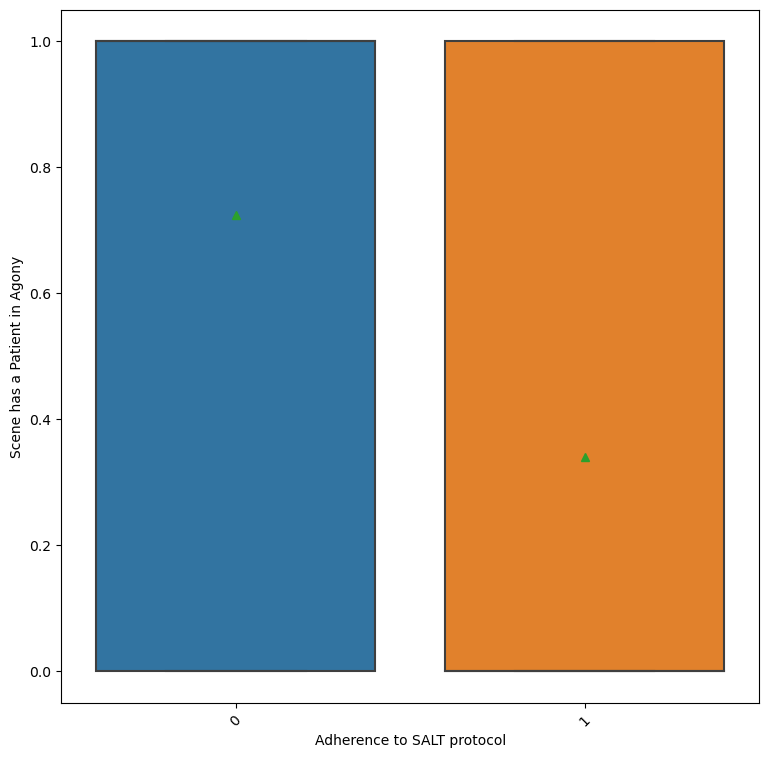

In [13]:

# Show a box plot with whiskers

# Convert the columns to numeric using a dictionary mapping
columns_list = ['adherence_to_salt', 'has_patient_in_agony']
mapping = {False: 0, True: 1}
df = distance_delta_df[columns_list].replace(mapping)

# Create a figure and subplots
fig, ax = plt.subplots(1, 1, figsize=(9, 9))

# Create a box plot of the y column grouped by the x column
sns.boxplot(
    x='adherence_to_salt',
    y='has_patient_in_agony',
    showmeans=True,
    data=df,
    ax=ax
)

# Rotate the x-axis labels to prevent overlapping
plt.xticks(rotation=45)

# Label the x- and y-axis
ax.set_xlabel('Adherence to SALT protocol')
ax.set_ylabel('Scene has a Patient in Agony')

plt.show()

In [46]:

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance

# Prepare your data
X = distance_delta_df[['has_patient_in_agony', 'measure_of_distracted_ordering']]
y = distance_delta_df[['adherence_to_salt']]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create the logistic regression model
model = LogisticRegression()

# Train the model
inf_nan_mask = pd.concat([X_train, y_train], axis='columns').applymap(pd.notna).all(axis='columns')
if inf_nan_mask.any():
    X_train_filtered = X_train[inf_nan_mask]
    y_train_filtered = y_train[inf_nan_mask]
    model.fit(X_train_filtered, y_train_filtered)

    # Evaluate model performance on test set
    inf_nan_mask = pd.concat([X_test, y_test], axis='columns').applymap(pd.notna).all(axis='columns')
    X_test_filtered = X_test[inf_nan_mask]
    y_test_filtered = y_test[inf_nan_mask]
    if inf_nan_mask.any():
        accuracy = model.score(X_test_filtered, y_test_filtered)
        print('Accuracy:', accuracy)
    
    # Analyze model coefficients
    print('\nCoefficients:')
    for feature, coef in zip(X.columns, model.coef_[0]): print(f'    {feature}: {coef:.4f}')
    
    # Analyze feature importance (optional)
    if inf_nan_mask.any():
        importance = permutation_importance(model, X_test_filtered, y_test_filtered)
        print('\nFeature importances:')
        for feature, importance_value in zip(X.columns, importance.importances_mean):
            print(f'    {feature}: {importance_value:.4f}')

Accuracy: 0.7222222222222222

Coefficients:
    has_patient_in_agony: -1.9371
    measure_of_distracted_ordering: -0.3133

Feature importances:
    has_patient_in_agony: 0.1508
    measure_of_distracted_ordering: 0.0016
